In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#np.random.seed(0)
mensagem = np.random.randint(0,2, 100)
#randint(low, high=None, size =None, dtype = int)
#Return random integers from 'low' (inclusive) to 'high'(exclusive).

In [10]:
mensagem

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0])

# ASK - Amplitude Shift Keying #

In [24]:
#### CRIAR SINAL s0 e s1 que codificam bit 0 e bit 1 ####
#########################################################
fc = 400 #Hz
#tempo para transmitir um bit
Tb = 3 * 1/fc #3 períodos da sinusoide
A = 2
fs = 2000 # Fs tem de ser maior do que fmax*2
Ts = 1/fs
t = np.arange(0, Tb, Ts)
Sinal0 = np.zeros(len(t)) # sinal para o 0
Sinal1 = A*np.cos(2*np.pi * fc * t) # sinal para o 1
N = len(t)

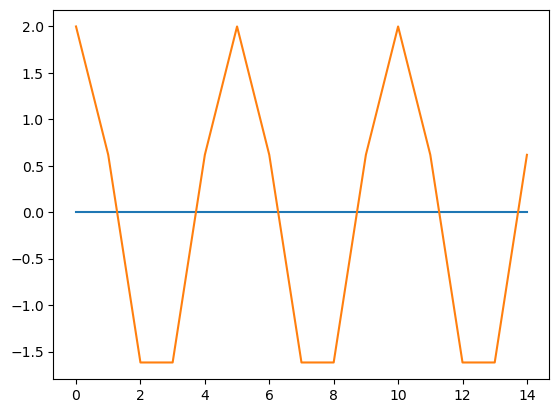

In [25]:
plt.plot(Sinal0)
plt.plot(Sinal1)

In [26]:
sinal = np.zeros(len(mensagem)*N) #array onde vamos guardar o sinal a enviar
indices = np.arange(len(mensagem)) #Ciclo for otimizado
for i in indices[mensagem == 1]:
    sinal[i*N:(i+1)*N] = Sinal1

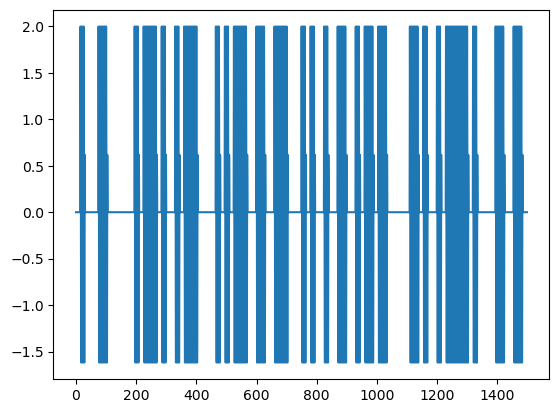

In [27]:
plt.plot(sinal)

# Canal de Comunicação

## Gerar ruido que segue uma distribuição Gaussiana

In [29]:
ruido = 0.3 * np.random.randn(len(sinal))

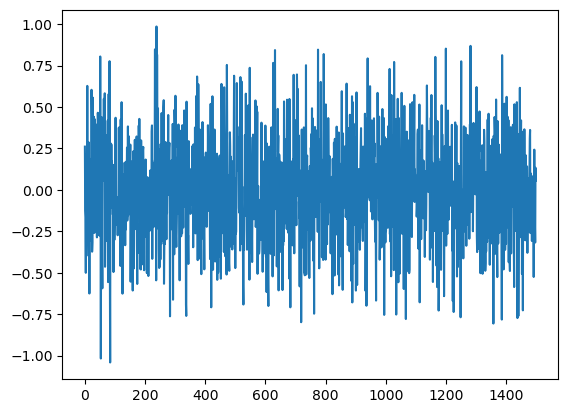

In [30]:
plt.plot(ruido)

In [31]:
np.mean(ruido)

0.0012854208464989252

In [32]:
np.std(ruido)

0.30802611559922244

(array([ 2.,  0.,  0.,  0.,  0.,  2.,  7.,  6.,  8.,  4., 11., 13., 17.,
        32., 19., 27., 39., 42., 45., 68., 57., 64., 75., 86., 76., 67.,
        70., 82., 80., 74., 74., 52., 50., 47., 40., 35., 28., 18., 22.,
        16., 11.,  9.,  5.,  2.,  6.,  6.,  4.,  1.,  0.,  1.]),
 array([-1.04177063, -1.00120843, -0.96064623, -0.92008403, -0.87952183,
        -0.83895964, -0.79839744, -0.75783524, -0.71727304, -0.67671084,
        -0.63614865, -0.59558645, -0.55502425, -0.51446205, -0.47389985,
        -0.43333766, -0.39277546, -0.35221326, -0.31165106, -0.27108886,
        -0.23052667, -0.18996447, -0.14940227, -0.10884007, -0.06827787,
        -0.02771568,  0.01284652,  0.05340872,  0.09397092,  0.13453312,
         0.17509531,  0.21565751,  0.25621971,  0.29678191,  0.33734411,
         0.3779063 ,  0.4184685 ,  0.4590307 ,  0.4995929 ,  0.5401551 ,
         0.58071729,  0.62127949,  0.66184169,  0.70240389,  0.74296609,
         0.78352828,  0.82409048,  0.86465268,  0.90521488,

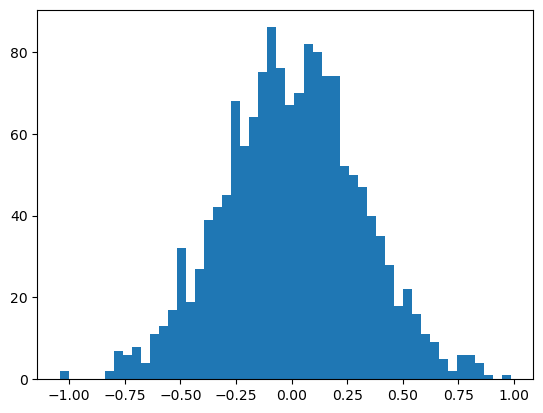

In [33]:
plt.hist(ruido, bins = 50)

In [34]:
y = sinal + ruido

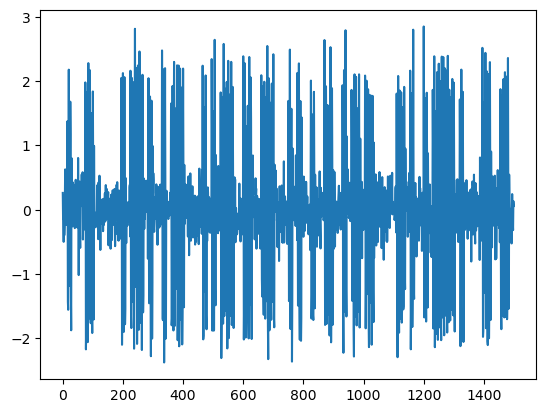

In [35]:
plt.plot(y)

# Recetor versão 0
## Vamos fazer a multiplicaçõa e soma com a sinusoide que enviamos

In [45]:
decisoes = np.zeros(len(mensagem))
for indice in range(0, len(y), N):
    m = np.sum(y[indice : indice + N] * Sinal1)#??? produto interno?
    if m > A/2:
        decisoes[int(indice/N)] = 1

In [47]:
decisoes == mensagem 

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True, False,  True,  True, False,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True])